In [1]:
%matplotlib inline

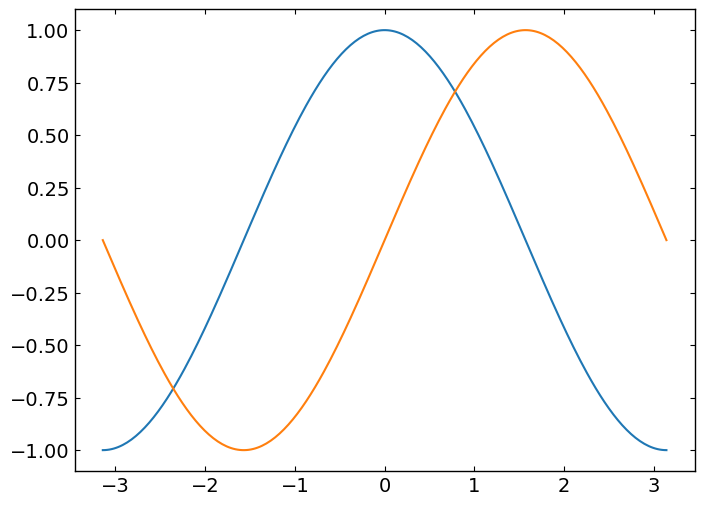

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c, s  = np.cos(x), np.sin(x)

plt.plot(x,c)
plt.plot(x,s)

plt.show()

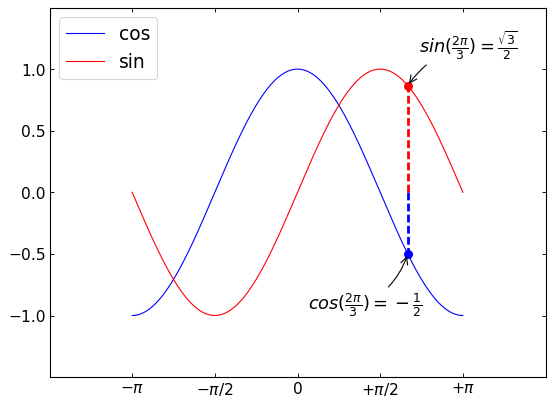

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6), dpi=80)
plt.subplot(1,1,1)

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c, s = np.cos(x), np.sin(x)

plt.plot(x,c, color="blue", linewidth=1., linestyle="-", label="cos")
plt.plot(x,s, color="red", linewidth=1., linestyle="-", label="sin")

#plt.xlim(-4.,4.)
plt.xlim(x.min()*1.5, x.max()*1.5)
#plt.xticks(np.linspace(-4,4,9, endpoint=True))
plt.xticks([-np.pi, -np.pi/2, 0., np.pi/2., np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
#plt.ylim(-1.,1.)
plt.ylim(c.min()*1.5, c.max()*1.5)
plt.yticks(np.linspace(-1,1,5, endpoint=True))

plt.legend(loc='upper left')

t = 2*np.pi/3.
plt.plot([t,t],[0,np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t,], [np.cos(t),], 50, color='blue')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$', 
            xy=(t, np.sin(t)), xycoords='data',
            xytext=(+10, +30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t,], [np.sin(t),], 50, color='red')
plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
            xy=(t, np.cos(t)), xycoords='data',
            xytext=(-90, -50), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


plt.show()

# matplotlibrc file (initial configuration)

- From matplotlib.matplotlib_fname(), we can check the location of the initial configuration (see below)
- If you want to manage the initial setting locally, you can copy the file "matplotlibrc" to ~/.config/matplotlib/
- The local folder should be in priority to read.
- change the setting in the configuration

Note that "%pylab inline" uses its own configuration for some parts (not all), you may need to force it down if you want to use the configuration regardless of "inline option"

- execute "ipython profile create"
- then "ipython_config.py" & "ipython_kernel_config.py" will be generated in "$HOME/.ipython/profile_default/" folder
- In the "ipython_kernel_config.py", add the line "c.InlineBackend.rc = {}"
- To remove the grey background color in the figure, you may need to set figure.facecolor to "white" in matplotlibrc configuration file.

In [4]:
import matplotlib as mpl

print mpl.matplotlib_fname()

/home/astrodoo/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [5]:
!cat /home/astrodoo/.config/matplotlib/matplotlibrc

### MATPLOTLIBRC FORMAT

# This is a sample matplotlib configuration file - you can find a copy
# of it on your system in
# site-packages/matplotlib/mpl-data/matplotlibrc.  If you edit it
# there, please note that it will be overwritten in your next install.
# If you want to keep a permanent local copy that will not be
# overwritten, place it in the following location:
# unix/linux:
#     $HOME/.config/matplotlib/matplotlibrc or
#     $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
# other platforms:
#     $HOME/.matplotlib/matplotlibrc
#
# See http://matplotlib.org/users/customizing.html#the-matplotlibrc-file for
# more details on the paths which are checked for the configuration file.
#
# This file is best viewed in a editor which supports python mode
# syntax highlighting. Blank lines, or lines starting with a comment
# symbol, are ignored, as are trailing comments.  Other lines must
# have the format
#    key : val # optional comment
#
# Colors: for the color 

## tick format (eliminating the automatic offset)

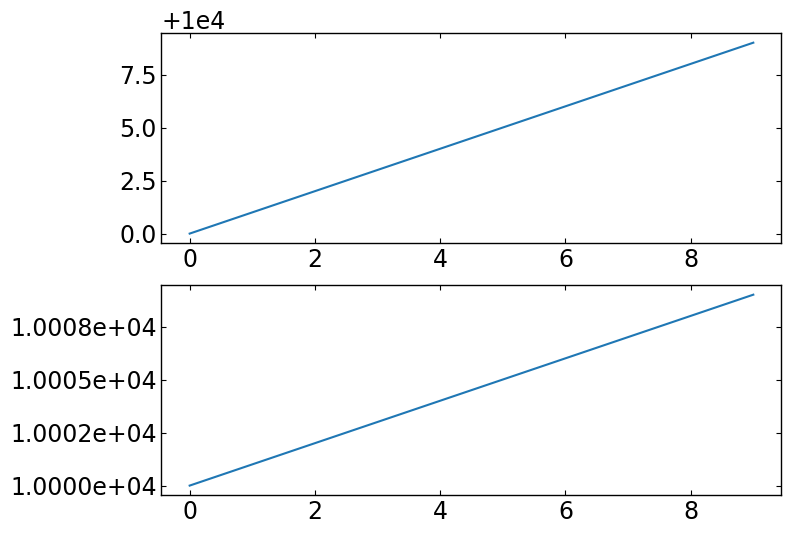

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np  

%matplotlib inline

fig,(ax1,ax2)=plt.subplots(2)

ax1.plot(np.arange(10000,10010,1))

ax2.plot(np.arange(10000,10010,1))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4e'))

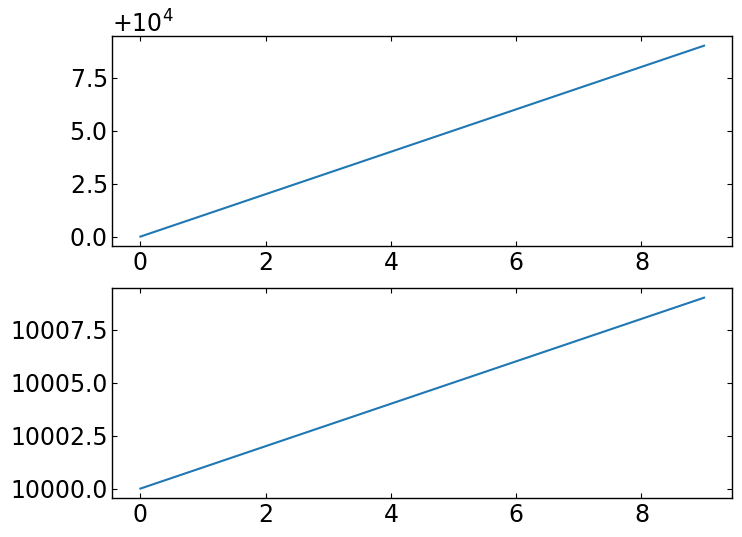

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np  

%matplotlib inline

fig,(ax1,ax2)=plt.subplots(2)

ax1.plot(np.arange(10000,10010,1))
formatter1 = mtick.ScalarFormatter(useMathText=True)
ax1.yaxis.set_major_formatter(formatter1)

ax2.plot(np.arange(10000,10010,1))
formatter = mtick.ScalarFormatter(useOffset=False)
ax2.yaxis.set_major_formatter(formatter)

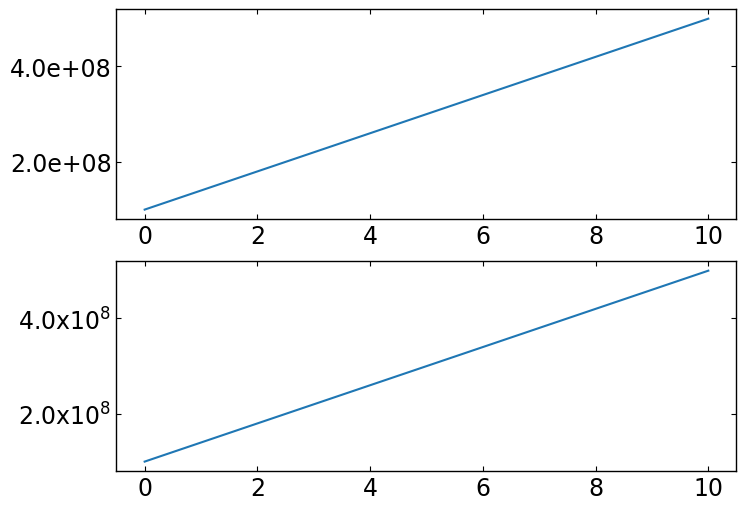

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np  

%matplotlib inline

fig,(ax1,ax2)=plt.subplots(2)

x = np.linspace(0,10,100)
y = np.linspace(1e8,5e8,100)

ax1.plot(x,y)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

# y-value is devided by 1e8 for tick formatter
ax2.plot(x,y/1e8)
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter(r'%.1fx$10^{8}$'))

## Func formatter

[-5 -4 -3 -2 -1  0  1  2  3  4]


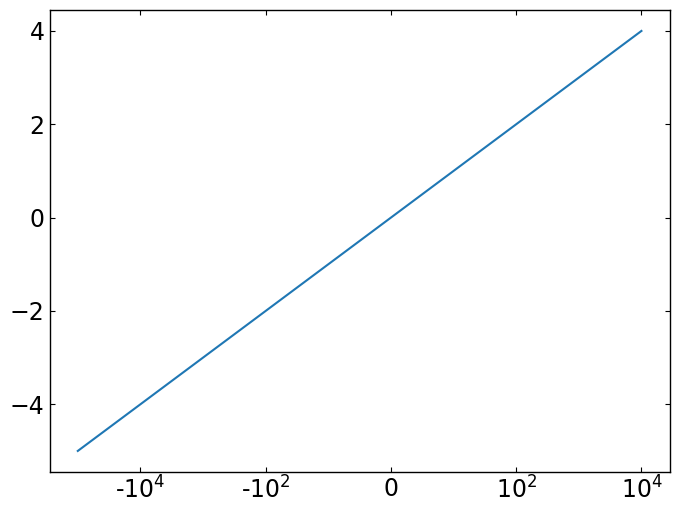

In [1]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def format_tick(x,pos=None):
    xabs = np.abs(x)

    if x>0:
        xstr = r'$10^{%i}$'%(xabs)
    elif x<0:
        xstr = r'-$10^{%i}$'%(xabs)
    else:
        xstr = '0'
        
    return xstr
    

x = np.arange(10)-5

print x

fig,ax = plt.subplots()

ax.plot(x,x)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(format_tick))

## Major ticks & Minor ticks

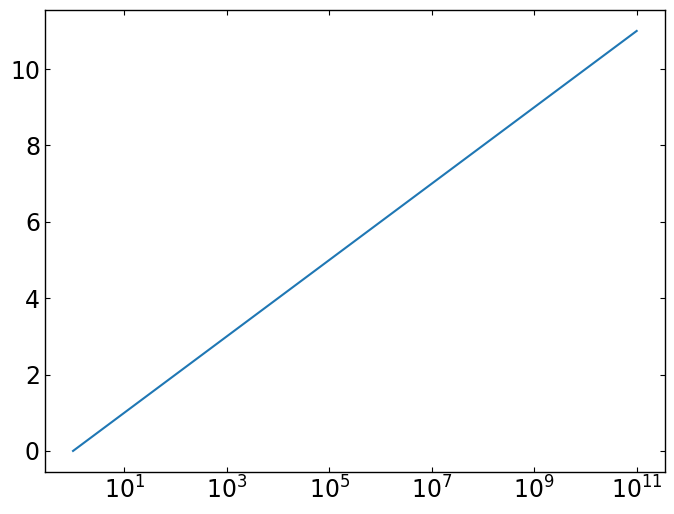

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

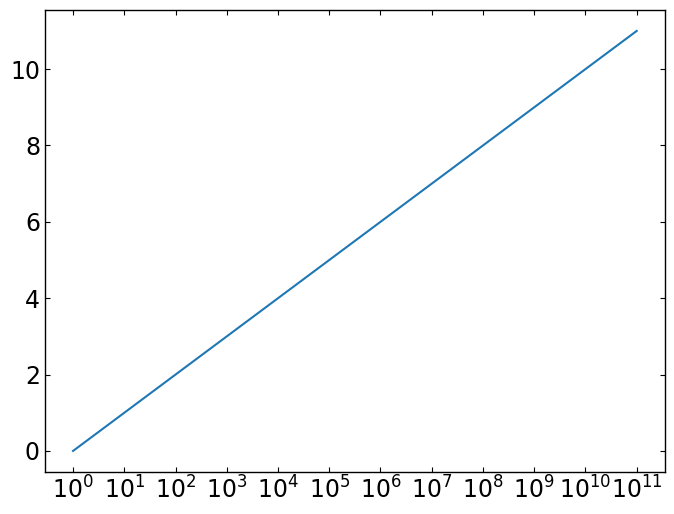

In [9]:
""" Log scale; modify number of major ticks (1st method) """

import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

ax.locator_params(axis='x',numticks=12)

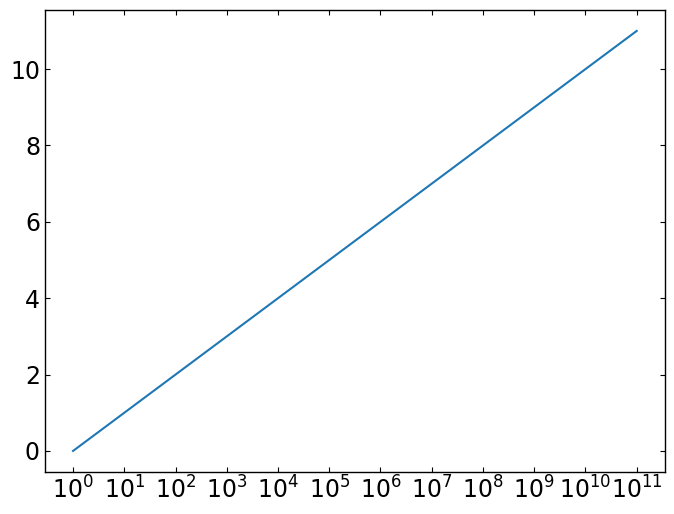

In [10]:
""" Log scale; modify number of major ticks (2nd method) """

import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax.xaxis.set_major_locator(locmaj)

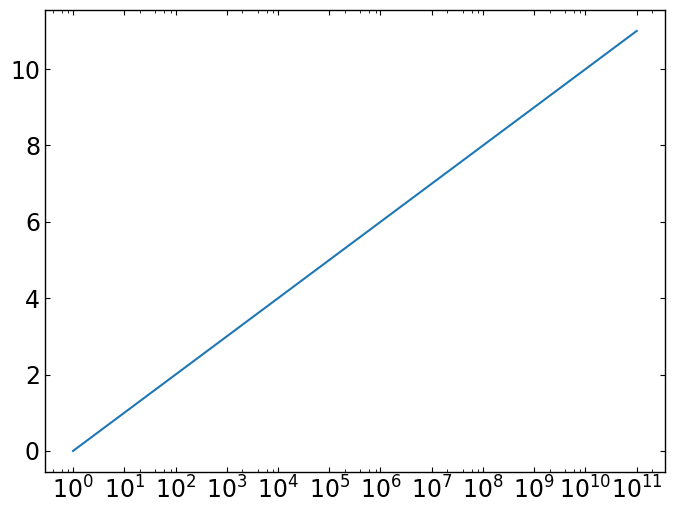

In [13]:
""" Log scale; modify number of minor ticks """
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax.xaxis.set_major_locator(locmaj)

# sub should be over two decades !!!
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 ))  
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

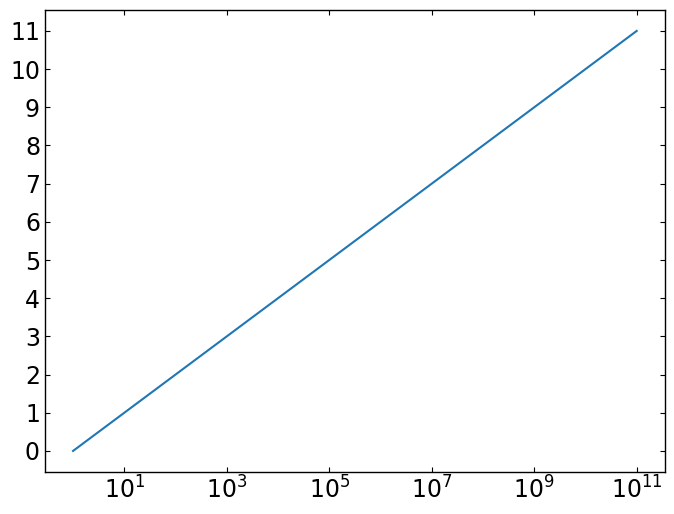

In [16]:
""" linear scale; modify number of major ticks """

import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

ax.locator_params(axis='y',nbins=15)

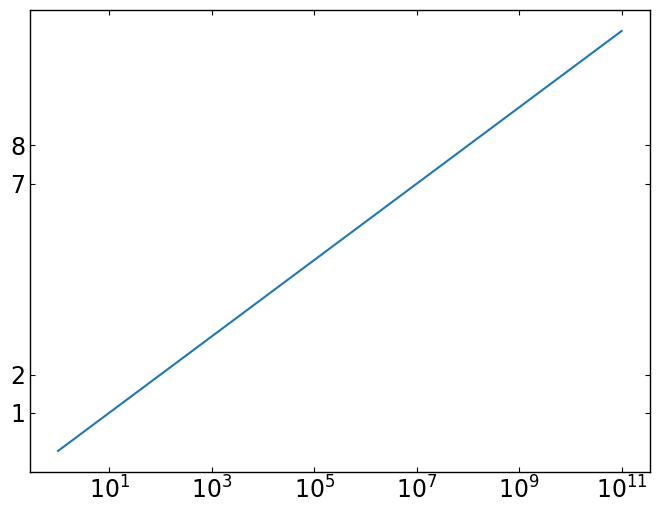

In [21]:
""" linear scale; specify the major ticks """

import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

ax.set_yticks((1,2,7,8))